In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
data=pd.read_csv('survey_data.csv')

In [46]:
data.shape

(1258, 29)

In [47]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Year,Month
0,27-Aug-2014,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,...,No,Some of them,Yes,No,Maybe,Yes,No,NaN,2014,8
1,27-Aug-2014,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,No,No,No,No,No,Don't know,No,NaN,2014,8
2,27-Aug-2014,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,...,No,Yes,Yes,Yes,Yes,No,No,NaN,2014,8
3,27-Aug-2014,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,2014,8
4,27-Aug-2014,31,Male,United States,TX,NaN,No,No,Never,100-500,...,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,2014,8


In [48]:
data.describe()

,Age,Year,Month
count,1.258000e+03,1258.000000,1258.000000
mean,7.949129e+07,2014.054054,7.801272
std,2.819419e+09,0.226214,1.248808
min,-1.726000e+03,2014.000000,1.000000
25%,2.700000e+01,2014.000000,8.000000
50%,3.100000e+01,2014.000000,8.000000
75%,3.600000e+01,2014.000000,8.000000
max,1.000000e+11,2015.000000,12.000000


In [49]:
data.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1094
Year                            0
Month                           0
dtype: int64

In [50]:
data.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments', 'Year', 'Month'],
      dtype='object')

In [51]:
# we only need state for US and we don't need comments so we drop them
data.drop('comments',axis=1,inplace=True)
data.drop('state',axis=1,inplace=True)
data.drop('Timestamp',axis=1,inplace=True)


In [52]:
data.isna().sum()

Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
Year                           0
Month                          0
dtype: int64

In [53]:
print(data['work_interfere'].unique())
print(data['self_employed'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' nan]
[nan 'Yes' 'No']


In [54]:
# Here ,work_intefere ask question if you have the mental condition , does it interfere your work?
# we assume that nan is the person having no mental health condition so we replace nan with no answer 
data['work_interfere'] = data['work_interfere'].fillna('no answer')
print("\n",data['work_interfere'].unique(),"\n")


 ['Often' 'Rarely' 'Never' 'Sometimes' 'no answer'] 



In [55]:
# as remaings are less so we just drop them
data.dropna(inplace=True) 

In [56]:
data.isna().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
Year                         0
Month                        0
dtype: int64

In [57]:
#no. of rows and columns after dropping the null values
data.shape

(1240, 26)

In [58]:
data.describe()

,Age,Year,Month
count,1.240000e+03,1240.000000,1240.000000
mean,8.064519e+07,2014.054839,7.798387
std,2.839809e+09,0.227757,1.257615
min,-1.726000e+03,2014.000000,1.000000
25%,2.700000e+01,2014.000000,8.000000
50%,3.100000e+01,2014.000000,8.000000
75%,3.600000e+01,2014.000000,8.000000
max,1.000000e+11,2015.000000,12.000000


In [59]:
data.duplicated().sum()

4

In [60]:
dup = data.duplicated()
data[dup]

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Year,Month
821,35,Male,Denmark,Yes,Yes,Yes,Often,5-Jan,No,Yes,...,No,No,Some of them,Some of them,Maybe,Yes,Yes,No,2014,8
860,32,male,United Kingdom,No,Yes,Yes,Rarely,25-Jun,No,No,...,Yes,Maybe,Some of them,No,No,No,No,No,2014,8
1134,27,M,New Zealand,No,No,No,Rarely,26-100,No,Yes,...,Yes,No,No,No,No,Maybe,No,Yes,2014,8
1218,28,male,Netherlands,No,No,No,no answer,25-Jun,No,Yes,...,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No,2015,2


In [61]:
data = data.drop_duplicates()

<AxesSubplot:>

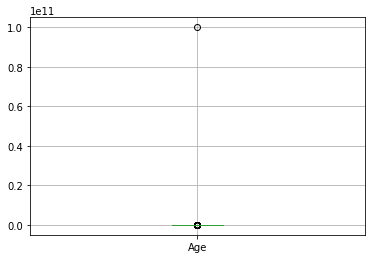

In [62]:
data.boxplot(column = "Age")

In [63]:
#Outliers for Age column
# 1st quartile
Q1 = np.percentile(data["Age"],25)
# 3rd quartile
Q3 = np.percentile(data["Age"],75)
# IQR
IQR = Q3 - Q1
# Outlier step
outlier_step = IQR * 1.5
# detect outlier and their indeces
outlier_df = data[(data["Age"] < Q1 - outlier_step) | (data["Age"] > Q3 + outlier_step)]
outlier_df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Year,Month
38,50,M,United States,No,No,No,no answer,100-500,No,Yes,...,No,No,Some of them,Yes,No,Maybe,Don't know,No,2014,8
143,-29,Male,United States,No,No,No,no answer,More than 1000,Yes,No,...,No,No,Some of them,Yes,No,No,Don't know,No,2014,8
294,56,Male,United States,No,No,Yes,Never,More than 1000,No,Yes,...,No,Maybe,Yes,Some of them,No,Maybe,Don't know,No,2014,8
297,60,male,United States,No,No,No,no answer,More than 1000,No,Yes,...,No,No,Some of them,Yes,Maybe,Maybe,Yes,No,2014,8
347,54,M,United States,No,Yes,Yes,Never,More than 1000,No,Yes,...,No,No,No,Yes,No,No,Don't know,No,2014,8


In [64]:
data = data.drop(outlier_df.index, axis = 0).reset_index(drop = True)
data

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Year,Month
0,46,male,United States,Yes,Yes,No,Sometimes,5-Jan,Yes,Yes,...,No,No,Yes,Yes,No,Yes,Yes,Yes,2014,8
1,36,Male,France,Yes,Yes,No,no answer,25-Jun,Yes,Yes,...,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No,2014,8
2,29,Male,United States,No,Yes,Yes,Sometimes,100-500,No,Yes,...,Maybe,No,Some of them,Some of them,No,No,No,No,2014,8
3,31,male,United States,Yes,No,No,Never,5-Jan,Yes,Yes,...,No,No,Some of them,Some of them,No,Maybe,Yes,No,2014,8
4,46,Male,United States,No,No,Yes,Often,26-100,Yes,Yes,...,Maybe,No,Some of them,Yes,No,Maybe,No,No,2014,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,36,Male,United States,No,Yes,No,Rarely,More than 1000,No,No,...,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No,2015,8
1192,26,male,United Kingdom,No,No,Yes,no answer,26-100,No,Yes,...,No,No,Some of them,Some of them,No,No,Don't know,No,2015,9
1193,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,...,No,No,Some of them,Yes,No,No,Yes,No,2015,9
1194,34,male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,...,Yes,Yes,No,No,No,No,No,No,2015,11


In [65]:
print(data['Age'].unique())

[46 36 29 31 41 33 35 34 37 32 30 42 40 27 38 24 18 28 26 22 44 23 19 25
 39 45 21 43 48 20 47 49]


In [67]:
print(data['Gender'].unique())

['male' 'Male' 'Female' 'female' 'M' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Man'
 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer' 'Female (cis)'
 'Mail' 'cis male' 'Malr' 'Male ' 'femail' 'Cis Man'
 'ostensibly male, unsure what that really means']


In [68]:
male = ['male', 'Male','M', 'm', 'Male-ish', 'maile','Cis Male','Mal', 'Male (CIS)','Make','Male ', 'Man',
        'msle','cis male', 'Cis Man','Malr','Mail']
female = ['Female', 'female','Cis Female', 'F','f','Femake', 'woman','Female ','cis-female/femme','Female (cis)','femail','Woman','female']
trans = ['Trans-female','something kinda male?','queer/she/they','non-binary','All','fluid', 'Genderqueer','Androgyne', 'Agender','Guy (-ish) ^_^',
        'male leaning androgynous','Trans woman','Neuter', 'Female (trans)','queer','ostensibly male, unsure what that really means','trans']

data['Gender'].replace(to_replace=male,value='male',inplace=True)
data['Gender'].replace(to_replace=female,value='female',inplace=True)
data['Gender'].replace(to_replace=trans,value='trans',inplace=True)

print(data['Gender'].unique())

['male' 'female' 'trans' 'Nah' 'Enby']


In [69]:
for column in data.columns:
    print(data[column].unique())
print(data['Country'].unique())
print(data['self_employed'].unique())
print(data['family_history'].unique())
print(data['treatment'].unique())
print(data['remote_work'].unique())
print(data['tech_company'].unique())

[46 36 29 31 41 33 35 34 37 32 30 42 40 27 38 24 18 28 26 22 44 23 19 25
 39 45 21 43 48 20 47 49]
['male' 'female' 'trans' 'Nah' 'Enby']
['United States' 'France' 'United Kingdom' 'Canada' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Bulgaria' 'Sweden' 'Colombia' 'Latvia' 'Romania'
 'Belgium' 'New Zealand' 'Spain' 'Finland' 'Uruguay' 'Israel'
 'Bosnia and Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Greece' 'Moldova' 'Georgia'
 'China' 'Czech Republic' 'Philippines']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes']
['Sometimes' 'no answer' 'Never' 'Often' 'Rarely']
['5-Jan' '25-Jun' '100-500' '26-100' 'More than 1000' '500-1000']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No' "Don't know"]
['Not sure' 'No' 'Yes']
['Yes' 'No' "Don't know"]
["Don't know" 'No' 'Yes']
['Yes' 'No' "Don't know"]
['Very easy' 'Somewhat easy' 'Somewh

In [70]:
data.isna().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
Year                         0
Month                        0
dtype: int64

In [71]:
data.dropna(inplace=True)
data.drop(data[data['Gender'] == 'Nah'].index,inplace=True)
data.drop(data[data['Gender'] == 'Enby'].index,inplace=True)
data.drop(data[data['Gender'] == 'A little about you'].index,inplace=True)
data.isna().sum()
data.shape

(1194, 26)

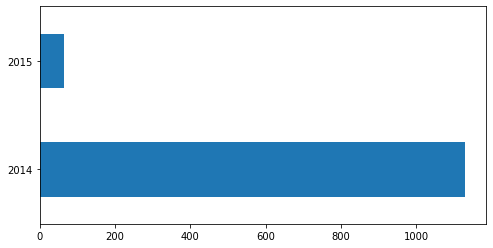

In [72]:
#finding the no. of movie release in a year
data.Year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(8,4))
plt.show()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Month'}>, <AxesSubplot:>]],
      dtype=object)

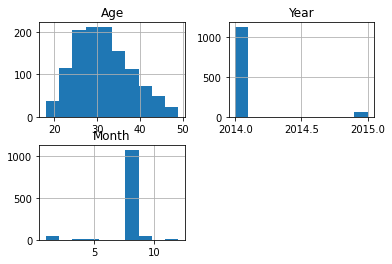

In [73]:
data.hist(bins=10)

<AxesSubplot:>

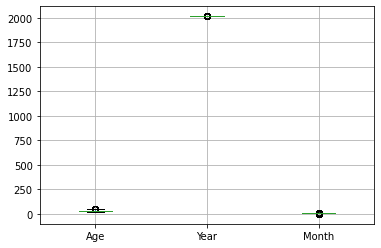

In [74]:
data.boxplot()

In [75]:
data.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'Year', 'Month'],
      dtype='object')

In [76]:
data = data[['Age','Gender','Country','self_employed','family_history','treatment','work_interfere','remote_work','tech_company','benefits','mental_health_consequence','phys_health_consequence','mental_vs_physical']]

In [77]:
data.shape
data.head(1)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,mental_health_consequence,phys_health_consequence,mental_vs_physical
0,46,male,United States,Yes,Yes,No,Sometimes,Yes,Yes,Yes,No,No,Yes


In [78]:
data.to_csv("cleandata.csv", index=False)